# Programming Assigment 1
### Intro into RDKit and similarity search

## 1. load dataset in a Jupyter notebook and extract relevant column to be processed

In [48]:
import pandas as pd

df = pd.read_csv("compounds.csv", sep=";")
df.head()

,name,smiles,pubmed
0,"Ethyl 2-amino-3-(3,4-dihydroxyphenyl)propanoate",CCOC(=O)C(CC1=CC(=C(C=C1)O)O)N,https://pubchem.ncbi.nlm.nih.gov/compound/1179...
1,"(S)-Methyl 2-amino-3-(3,4-dihydroxyphenyl)prop...",COC(=O)C(CC1=CC(=C(C=C1)O)O)N.Cl,https://pubchem.ncbi.nlm.nih.gov/compound/1013...
2,Etilevodopa,CCOC(=O)C(CC1=CC(=C(C=C1)O)O)N,https://pubchem.ncbi.nlm.nih.gov/compound/170345
3,Foslevodopa,C1=CC(=C(C=C1CC(C(=O)O)N)O)OP(=O)(O)O,https://pubchem.ncbi.nlm.nih.gov/compound/127766
4,Melevodopa,COC(=O)C(CC1=CC(=C(C=C1)O)O)N,https://pubchem.ncbi.nlm.nih.gov/compound/23497


In [49]:
smiles_column = df["smiles"]
smiles_column

0           CCOC(=O)C(CC1=CC(=C(C=C1)O)O)N
1         COC(=O)C(CC1=CC(=C(C=C1)O)O)N.Cl
2           CCOC(=O)C(CC1=CC(=C(C=C1)O)O)N
3    C1=CC(=C(C=C1CC(C(=O)O)N)O)OP(=O)(O)O
4            COC(=O)C(CC1=CC(=C(C=C1)O)O)N
5        C1=CC(=C(C=C1CC(C(=O)O)N)O)O.[Na]
6            COC1=C(C=C(C=C1)CC(C(=O)O)N)O
7            COC1=C(C=CC(=C1)CC(C(=O)O)N)O
Name: smiles, dtype: object

## 2. compute molecular fingerprints for each compound

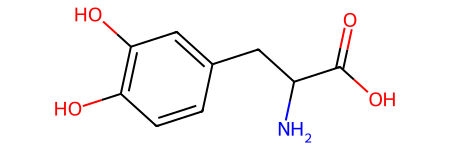

In [50]:
from rdkit import Chem
from rdkit.Chem import AllChem

fgen = AllChem.GetMorganGenerator(radius=2)

# reference compound - levodopa
levodopa_smiles = "C1=CC(=C(C=C1CC(C(=O)O)N)O)O"
levodopa_mol = Chem.MolFromSmiles(levodopa_smiles)
levodopa_fingerprint = fgen.GetFingerprint(levodopa_mol)

# compounds
df["mols"] = [Chem.MolFromSmiles(smiles) for smiles in smiles_column]
df["morgan"] = [fgen.GetFingerprint(mol) for mol in df["mols"]]

levodopa_mol

## 3. compute Tanimoto similarity measure for each pair of compound x reference compound 

In [51]:
from rdkit import DataStructs

df["tanimoto_morgan"] = [DataStructs.TanimotoSimilarity(levodopa_fingerprint, fingerprint) for fingerprint in df["morgan"]]
df[["name", "tanimoto_morgan"]]

,name,tanimoto_morgan
0,"Ethyl 2-amino-3-(3,4-dihydroxyphenyl)propanoate",0.638889
1,"(S)-Methyl 2-amino-3-(3,4-dihydroxyphenyl)prop...",0.638889
2,Etilevodopa,0.638889
3,Foslevodopa,0.615385
4,Melevodopa,0.657143
5,L-DOPA (sodium),0.964286
6,"Tyrosine, 3-hydroxy-O-methyl-",0.666667
7,3-Methoxytyrosine,0.666667


## 4. provide sorting, report top 3 hits and discuss your results (with reference to the first lecture and limitations) 

In [52]:
df = df.sort_values(by=["tanimoto_morgan"], ascending=False)
df[["name", "tanimoto_morgan"]].head(3)

,name,tanimoto_morgan
5,L-DOPA (sodium),0.964286
6,"Tyrosine, 3-hydroxy-O-methyl-",0.666667
7,3-Methoxytyrosine,0.666667


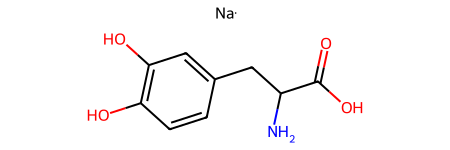

In [53]:
# display L-DOPA (sodium) mol to compare it with levodopa visualy
df.loc[df["name"] == "L-DOPA (sodium)", "mols"].iloc[0]

## Discussion
- L-DOPA (sodium) (sodium) ma similarity 0.96, vsechny ostatni slouceniny maji similarity mezi 0.6 a 0.7.
- L-DOPA (sodium) je tedy podle Tanimoto metriky zdaleka nejlepsi, coz ale bude tim, ze je to pravdepodobne ta sama molekula, jen ma navic ten sodik.
- Druhe a treti misto jsou Tyrosine, 3-hydroxy-O-methyl- a 3-Methoxytyrosine, ktere maji s molekulou levodopa podobnost 0.67, coz se ale prilis nelisi od dalsi molekuly, ktera ma 0.66, dalsi 0.64 a nejmene podobna 0.62.
- Nicmene na vysledek ma velky vliv vybrana metrika, tudiz to nemusi byt vypovydajici.
- Vysledky se velmi lisi i v pripade pouziti RDKit (topological) fingerprints misto Morgan fingerprints

## BONUS: implement N similarity measures (such as Tanimoto, Dice, Euclidean) x M (fingerprints) and compare them in a graphical form 

### Fingerprints
- RDKit (topological)
- Atom pairs
- Morgan (already calculated

In [54]:
levodopa_df = pd.DataFrame()
levodopa_df["morgan"] = [levodopa_fingerprint]

# RDKit (topological)
fgen =  AllChem.GetRDKitFPGenerator()
levodopa_df["topological"] = [fgen.GetFingerprint(levodopa_mol)]
df["topological"] = [fgen.GetFingerprint(mol) for mol in df["mols"]]
df["topological"]

# Atom pairs
fgen = AllChem.GetAtomPairGenerator()
levodopa_df["atom_pairs"] = [fgen.GetFingerprint(levodopa_mol)]
df["atom_pairs"] = [fgen.GetFingerprint(mol) for mol in df["mols"]]
df["atom_pairs"]

5    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
6    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
7    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
4    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
1    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
2    [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
0    [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
3    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
Name: atom_pairs, dtype: object

### Similarity measures
- Tanimoto
- Dice
- Cosine
- Sokal
- Kulczynski

In [55]:
for fingerprints in ["morgan", "topological", "atom_pairs"]:
    df[f"tanimoto_{fingerprints}"] = [DataStructs.TanimotoSimilarity(levodopa_df[fingerprints].iloc[0], fingerprint) for fingerprint in df[fingerprints]]
    df[f"dice_{fingerprints}"] = [DataStructs.DiceSimilarity(levodopa_df[fingerprints].iloc[0], fingerprint) for fingerprint in df[fingerprints]]
    df[f"cosine_{fingerprints}"] = [DataStructs.CosineSimilarity(levodopa_df[fingerprints].iloc[0], fingerprint) for fingerprint in df[fingerprints]]
    df[f"sokal_{fingerprints}"] = [DataStructs.SokalSimilarity(levodopa_df[fingerprints].iloc[0], fingerprint) for fingerprint in df[fingerprints]]
    df[f"kulczynski_{fingerprints}"] = [DataStructs.KulczynskiSimilarity(levodopa_df[fingerprints].iloc[0], fingerprint) for fingerprint in df[fingerprints]]

### Vizualization
- heatmap pro zobrazeni
- pearson pro vypocet korelace -> meri linearni korelaci mezi dvemi mnozinami dat
    - spocita prumer kazde mnoziny dat
    - spocita odchylky od prumeru
    - vynasobi ochylku z jedne mnoziny s odchylkou z druhe mnoziny (kladne cislo znamena vetsi korelace)
    - secte vsechny nasobky a normalizuje podle rozsahu tak, aby vyslo cislo mezi -1 a 1

,name,tanimoto_morgan,dice_morgan,cosine_morgan,sokal_morgan,kulczynski_morgan,tanimoto_topological,dice_topological,cosine_topological,sokal_topological,kulczynski_topological,tanimoto_atom_pairs,dice_atom_pairs,cosine_atom_pairs,sokal_atom_pairs,kulczynski_atom_pairs
5,L-DOPA (sodium),0.964286,0.981818,0.981981,0.931034,0.982143,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
6,"Tyrosine, 3-hydroxy-O-methyl-",0.666667,0.800000,0.804030,0.500000,0.808081,0.869942,0.930448,0.932707,0.769821,0.934971,0.678899,0.808743,0.811474,0.513889,0.814214
7,3-Methoxytyrosine,0.666667,0.800000,0.804030,0.500000,0.808081,0.838440,0.912121,0.915664,0.721823,0.919220,0.663636,0.797814,0.800508,0.496599,0.803211
4,Melevodopa,0.657143,0.793103,0.794996,0.489362,0.796894,0.895833,0.945055,0.946485,0.811321,0.947917,0.657658,0.793478,0.796495,0.489933,0.799524
1,"(S)-Methyl 2-amino-3-(3,4-dihydroxyphenyl)prop...",0.638889,0.779661,0.782476,0.469388,0.785301,0.895833,0.945055,0.946485,0.811321,0.947917,0.657658,0.793478,0.796495,0.489933,0.799524
2,Etilevodopa,0.638889,0.779661,0.782476,0.469388,0.785301,0.840782,0.913505,0.916942,0.725301,0.920391,0.592000,0.743719,0.752910,0.420455,0.762215
0,"Ethyl 2-amino-3-(3,4-dihydroxyphenyl)propanoate",0.638889,0.779661,0.782476,0.469388,0.785301,0.840782,0.913505,0.916942,0.725301,0.920391,0.592000,0.743719,0.752910,0.420455,0.762215
3,Foslevodopa,0.615385,0.761905,0.769800,0.444444,0.777778,0.685649,0.813514,0.828039,0.521664,0.842825,0.513699,0.678733,0.699135,0.345622,0.720151


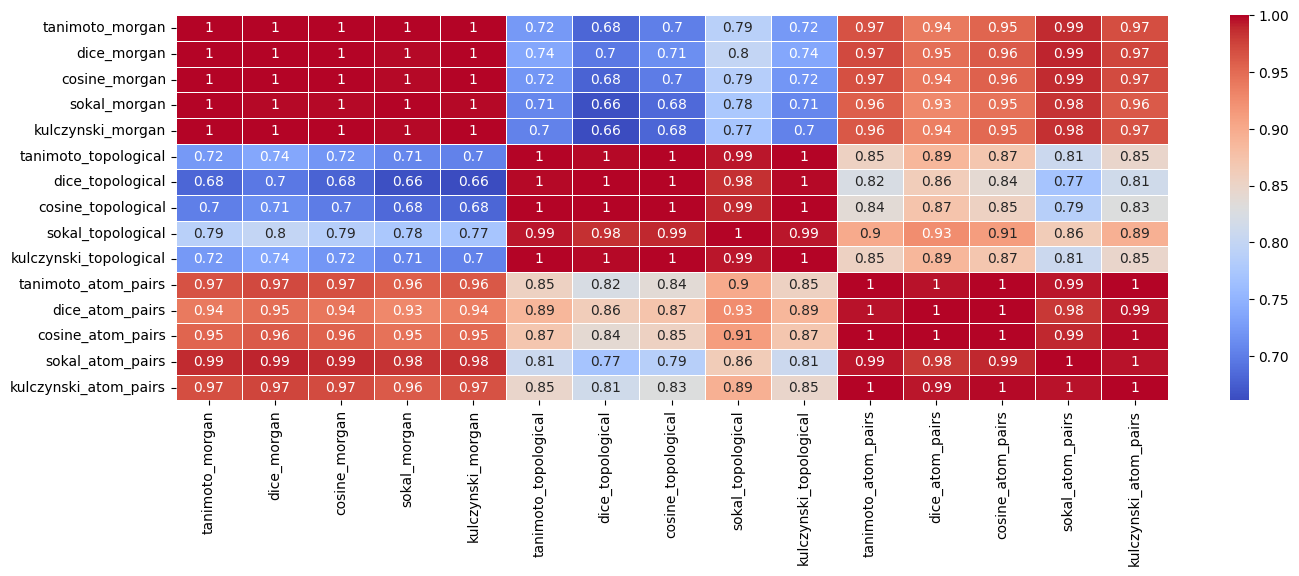

In [56]:
# heatmap
import seaborn as sns
import matplotlib.pyplot as plt

columns = [col for col in df.columns if any(metric in col for metric in ["tanimoto", "dice", "cosine", "sokal", "kulczynski"])]
result_df = df[columns].copy()

plt.figure(figsize = (16,5))
ax = sns.heatmap(result_df.corr(), annot=True, cmap="coolwarm", linewidths=.5)
result_df.insert(0, "name", df["name"])
result_df

### Discussion heatmap
- Z heatmapy je videt, ze je vyznamna korelace mezi jednotlivymi vysledky se stejnym pouzitym fingerprintem
- Ale velmi se lisi mezi jednotlivymi fingerprinty.
- Nejmenrsi korelace je mezi morgan a topological fingerprinty, mezi morgan a atom pairs je naopak vysoka korelace.
- Vypada to, ze pouzity fingerprint ma jeste vetsi vliv na vysledek, nez pouzita metrika, je tudiz potreba zvolit spravny fingerprint podle toho, ktery je pro danou ulohu nejvhodnejsi.
- Z tabulky vysledku je videt, ze prestoze maji stejne fingerprinty vysokou korelaci, hodnoty podobnosti se pro jednotlive metriky lisi.
- Take lze vypozorovat, ze morgan fingerprinty maji obecne mensi rozptyl, coz lze videt i na prikladu vyse s tanimoto metrikou, kdy veskere odlisne molekuly vysly mezi 0.6 a 0.7.
- Mozna by tudiz mohlo byt vhodnejsi zvolit bud topological nebo atom pairs fingerprinty, pricemz atom pairs vysledky lepe koreluji s morgan vysledky.
- Mohli bychom pro atom pairs fingerprinty vyuzit napriklad dice metriku nebo zustat u tanimoto.